<a href="https://colab.research.google.com/github/lourencocavalcante/CAP-421-3-Deep-Learning/blob/main/CAP_421_Image_processing_basics_LourencoCavalcante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# **Exercícios de nivelamento da disciplina "CAP-421-3: Aprendizado Profundo (*Deep Learning*)"**
**Professor:**
*Dr. Thales Sehn Körting*

**Aluno:**
*Lourenço José Cavalcante Neto*
<hr style="border:2px solid #0077b9;">

# **<span style="color:#336699">Exercícios de nivelamento sobre processamento de imagens</span>**

<hr style="border:2px solid #0077b9;">

## Classes 01 and 02
### Image Processing

Este notebook foi parte do curso Deep-Learning oferecido pelo [INPE](https://www.gov.br/inpe/pt-br) (Instituto Nacional de Pesquisas Espaciais) em sua primeira edição para as aulas "Noções básicas de processamento digital de imagens". Convolução: preenchimento, dimensão do filtro, erosão, dilatação." com o Professor Tales.

Este código é um treinamento para aprender processamento de imagens.

[https://github.com/lourencocavalcante](https://github.com/lourencocavalcante)

In [ ]:
#Importin the image file
raster_filename = 'heliponto_2.tif'
!wget https://github.com/tkorting/remote-sensing-images/raw/master/{raster_filename}

--2024-09-25 18:55:14--  https://github.com/tkorting/remote-sensing-images/raw/master/heliponto_2.tif
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/heliponto_2.tif [following]
--2024-09-25 18:55:14--  https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/heliponto_2.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122951 (120K) [image/tiff]
Saving to: ‘heliponto_2.tif’

heliponto_2.tif     100%[===================>] 120.07K  --.-KB/s    in 0.03s   

2024-09-25 18:55:15 (4.67 MB/s) - ‘heliponto_2.tif’ saved [122951/122951]



In [ ]:
#Import cv2 libary
import cv2

opencv_matrix = cv2.imread(raster_filename, cv2.IMREAD_GRAYSCALE)

print(opencv_matrix.shape)
print(type(opencv_matrix))

(334, 359)
<class 'numpy.ndarray'>


In [ ]:
# type(opencv_matrix)

In [ ]:
try:
  import rasteirio as rio
except:
  #rasteio is not installed by
  #!pip install rasterio
  import rasterio as rio

with rio.open(raster_filename) as rio_raster:
  rio_matrix = rio_raster.read(1)

  print(type(rio_raster))
  print(rio_matrix.shape)
  print(type(rio_matrix))

<class 'rasterio.io.DatasetReader'>
(334, 359)
<class 'numpy.ndarray'>


In [ ]:
from osgeo import gdal

gdal_raster = gdal.Open(raster_filename, gdal.GA_ReadOnly)
gdal_band = gdal_raster.GetRasterBand(1)
gdal_matrix = gdal_band.ReadAsArray()

print(type(gdal_raster))
print(gdal_matrix.shape)
print(type(gdal_matrix))

<class 'osgeo.gdal.Dataset'>
(334, 359)
<class 'numpy.ndarray'>


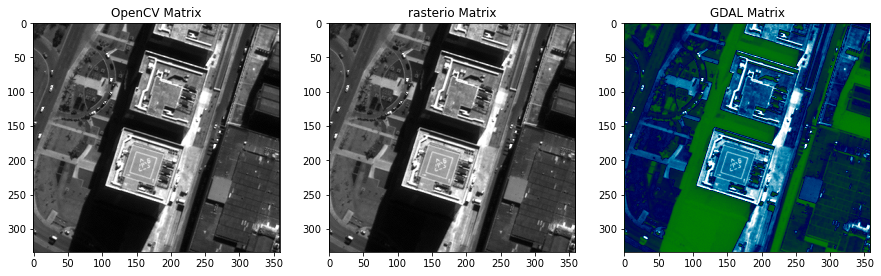

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 35))

plt.subplot(131)
plt.imshow(opencv_matrix, cmap = 'gray')
plt.title('OpenCV Matrix')

plt.subplot(132)
plt.imshow(rio_matrix, cmap = 'gray')
plt.title('rasterio Matrix')

#testing new color
plt.subplot(133)
plt.imshow(gdal_matrix, cmap = 'ocean')
plt.title('GDAL Matrix')

plt.show()

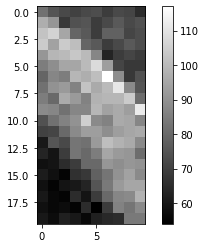

[[ 82  75  72  70  72  73  69  72  71  65]
 [ 97  91  68  74  75  69  72  76  72  74]
 [102 106  95  79  76  69  78  78  71  73]
 [104  94 104 101  79  76  69  72  76  73]
 [ 91  99 100 103 100  87  63  69  71  69]
 [ 85  89  95  95 100 108  93  71  68  68]
 [ 79  87  85  99  97 101 117  89  68  74]
 [ 82  90  92  86 102  96 100 111  88  75]
 [ 85  80  96  92  86  98  99  99 104  81]
 [ 88  87  82  87  87  99  94  96  93 112]
 [ 74  82  86  90 105  88  86  96  95  87]
 [ 70  71  80  88  93  93  89  93  95  96]
 [ 60  75  72  83  82  92 101  98  96  88]
 [ 63  59  69  83  80  85  95  92  91  81]
 [ 58  59  65  69  80  80  91  89  91  90]
 [ 61  58  55  66  68  78  83  90  94  88]
 [ 58  55  59  60  63  75  84  92  95  95]
 [ 60  56  55  65  59  69  80  87  88  98]
 [ 58  56  57  55  65  54  69  86  83  88]
 [ 60  57  62  60  56  62  64  65  84  84]]


In [ ]:
#Printing a peace of the chart
block_matrix = rio_matrix[20:40, 15:25]

plt.figure()
plt.imshow(block_matrix, cmap = 'gray')#,vmin=0, vmax=70)
plt.colorbar()
plt.show()

print(block_matrix)

# Spatial filtering

https://www.youtube.com/embed/hRtmSh2gF48?start=42

<center><iframe width="800" height="500" src="https://www.youtube.com/embed/hRtmSh2gF48?start=42" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></center>

# Exercise 1

Create a convolution kernel called `average_kernel` as a `numpy array` with the following parameters:
* width: 15
* height: 15
* weights: all values equal to 1 / (15 * 15) or `~0.00444`

then apply it to `raster_filename`.

Display, using `matplotlib`, the input (`rio_matrix`) and output (`conv_matrix`) images.

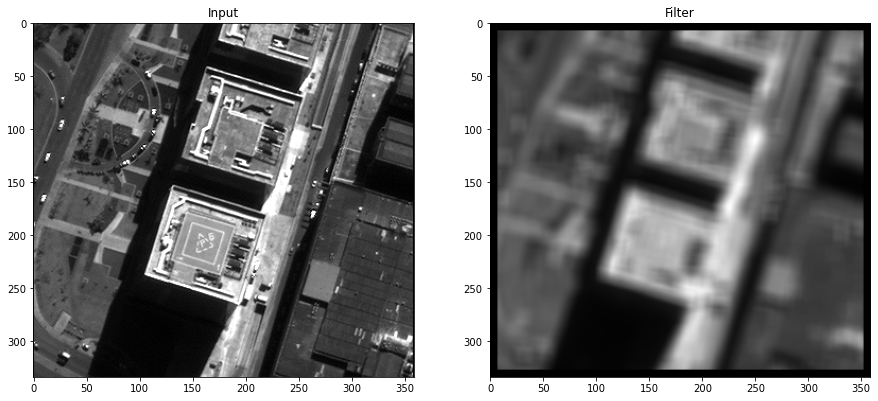

In [ ]:
import numpy as np

#Inicial Parametes
width = 15
height = 15
weigth = 1/(15*15)

color = 'gray'

# Creating a midpoint
width_mean  = int( width/2)
height_mean = int(height/2)


new_matrix = rio_matrix.copy() #The matrix we use subtitution
rows   = new_matrix.shape[0]   #lent os rows
coluns = new_matrix.shape[1]   #lent of colluns

#Creating a The Avarege Kernel
avarege_kernel = (np.ones((width,height)))*weigth #creatind a matrix with 1 ones

#Creating a Empty Matrix
conv_matrix=[]
conv_matrix= np.zeros_like(new_matrix)


for i in range(height_mean,rows-height_mean):
    for j in range(width_mean,coluns-width_mean):
        box_matrix = new_matrix[i-height_mean : i + height_mean +1 ,
                                j-width_mean  : j + width_mean  +1]
        conv_matrix[i,j] = np.dot(box_matrix.flatten(),avarege_kernel.flatten())

#Ploting
plt.figure(figsize=(15,35))
plt.subplot(121)
plt.imshow(rio_matrix, cmap = color)#,vmin=0, vmax=100)
plt.title('Input')

plt.subplot(122)
plt.imshow(conv_matrix, cmap= color)
plt.title('Filter')

plt.show()


# Exercice 1
## No-Padding effect

Here we solve the Pading problem by creating a condition for the size of the box_matrix. Unlike adding columns with zeros or ones, with this logic the kernal will not perform the multiplication with false weights. In this way, only the points that are in the vicinity of the central pixel will be taken into account. If it does not exist, it will not be taken into account.

For that, I defined four functions that will delimit the existence condition and limit the box size.

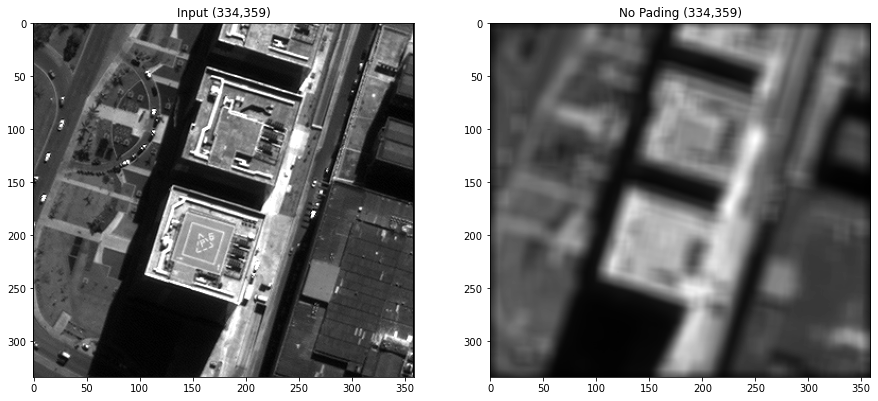

In [ ]:
import numpy as np

#Inicial Parametes
width  = 15
height = 15
weigth = 1/(15*15)

color = 'gray'

# Creating a midpoint
width_mean  = int( width/2)
height_mean = int(height/2)

new_matrix = rio_matrix.copy() #The matrix we use subtitution
rows   = new_matrix.shape[0]   #lent os rows
coluns = new_matrix.shape[1]   #lent of colluns

#Creating a variable size for the box_matrix
def lower_width(x):  return 0                    if x < width_mean           else x - width_mean
def upper_width(x):  return x + width_mean +1    if x < rows-width_mean      else rows
def lower_height(x): return 0                    if x < height_mean          else x - height_mean
def upper_height(x): return x +height_mean +1    if x < coluns-height_mean   else coluns

#Creating a Empty Matrix
conv_matrix=[]
conv_matrix= np.zeros_like(new_matrix)

#Defining
for i in range(rows):
    for j in range(coluns):
        box_matrix = new_matrix[lower_width(i)  : upper_width(i) ,
                                lower_height(j) : upper_height(j)]
        avarege_kernel = np.ones((box_matrix.shape[0],box_matrix.shape[1]))*weigth #creating the kernel
        conv_matrix[i,j] =  np.dot(box_matrix.flatten(),avarege_kernel.flatten())  #alocating the conv_matrix

#Plotting
plt.figure(figsize=(15,35))
plt.subplot(121)
plt.imshow(rio_matrix, cmap = color)#,vmin=0, vmax=100)
plt.title('Input ('+str(rio_matrix.shape[0])+','+str(rio_matrix.shape[1])+')')

plt.subplot(122)
plt.imshow(conv_matrix, cmap= color)
plt.title('No Pading ('+str(conv_matrix.shape[0])+','+str(conv_matrix.shape[1])+')')

plt.show()


# Exercise 2
Using the same convolution kernel defined in the previous exercise, apply it to `raster_filename` using a stride of 5.

Display, using `matplotlib` input (`rio_matrix`) and output (`conv_matrix_stride`) images.

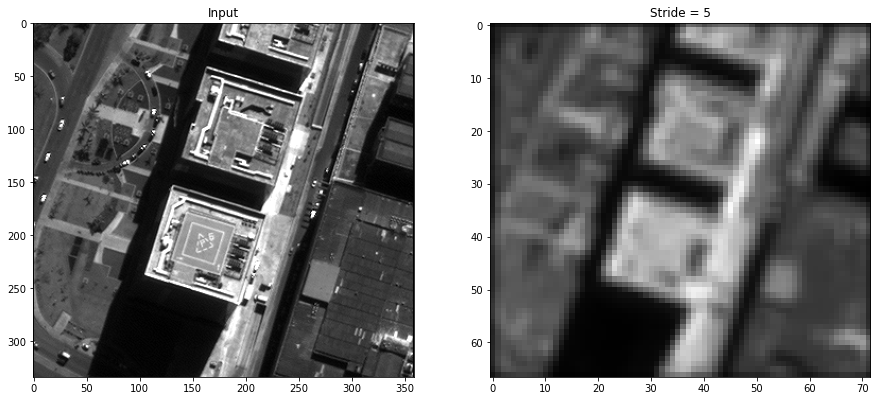

In [ ]:
import numpy as np

#Inicial Parametes

weigth = 1/(15*15)

color = 'gray'

#Defining the Kernel
avarege_kernel = np.ones((15,15))*weigth

kernel = avarege_kernel

width  = kernel.shape[0]
height = kernel.shape[1]

# Creating a midpoint
width_mean  = int( width/2)
height_mean = int(height/2)

new_matrix = rio_matrix.copy() #The matrix we use subtitution
rows   = new_matrix.shape[0]   #lent os rows
coluns = new_matrix.shape[1]   #lent of colluns

#Creating a variable size for the box_matrix
def lower_width(x):  return 0                    if x < width_mean           else x - width_mean
def upper_width(x):  return x + width_mean +1    if x < rows-width_mean      else rows
def lower_height(x): return 0                    if x < height_mean          else x - height_mean
def upper_height(x): return x +height_mean +1    if x < coluns-height_mean   else coluns

#The Stride parameter
stride = 5

ones = np.ones_like(new_matrix)

#Defining
for i in range(0,rows,stride):
    #new_row.append(0)
    for j in range(0,coluns,stride):
        box_matrix = new_matrix[lower_width(i)  : upper_width(i) ,
                                lower_height(j) : upper_height(j)]
        new_kernel_matrix =  kernel[0:box_matrix.shape[0],0:box_matrix.shape[1]]
        ones[i,j] = np.dot (box_matrix.flatten(),new_kernel_matrix.flatten())  #alocating the conv_m
        conv_matrix = ones[ones != 1] if stride != 1 else ones #Conditional for stride = 1

#Find the new dimension
new_row, new_collum = [],[]
for i in range(0,rows,stride):    new_row.append(0)
for i in range(0,coluns,stride):  new_collum.append(0)
new_row, new_collum = len(new_row),len(new_collum)

#Reshaping for the new dimension
conv_matrix = np.array(conv_matrix).reshape(new_row,new_collum)

#Rename
conv_matrix_stride = conv_matrix

#Ploting
plt.figure(figsize=(15,35))
plt.subplot(121)
plt.imshow(rio_matrix, cmap = color)#,vmin=0, vmax=100)
plt.title('Input')

plt.subplot(122)
plt.imshow(conv_matrix_stride, cmap= color)
plt.title('Stride = '+str(stride))

plt.show()

# import time
# start_time = time.time()
# print("--- %s seconds ---" % (time.time() - start_time))

# Exercise 3

Create a convolution kernel called `high_pass_kernel` as a `numpy array` with the following weights:

```
-1 -1 -1 -1 -1
 2  2  2 -1 -1
-1  2  2  2 -1
-1 -1 -1  2  2
-1 -1 -1 -1 -1
```

then apply it to `raster_filename`.

Display, using `matplotlib`, the input (`rio_matrix`) image, the output (`conv_matrix`) image, and the kernel.

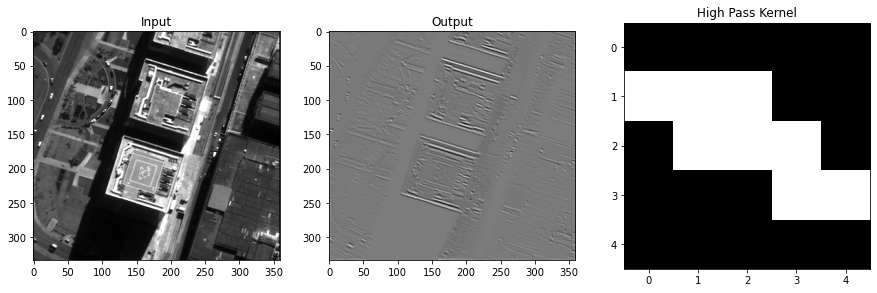

In [ ]:
import numpy as np

# Control Parameners
#defining the kernel
high_pass_kernel = np.array([
[-1, -1, -1, -1, -1],
[ 2,  2,  2, -1, -1],
[-1,  2,  2,  2, -1],
[-1, -1, -1,  2,  2],
[-1, -1, -1, -1, -1]])

stride = 1

color = 'gray'

kernel = high_pass_kernel

##############################################

#Inicial Parametes
width  = kernel.shape[0]
height = kernel.shape[1]
#weigth = 1/(15*15)

# Creating a the size of the box
# Creating a midpoint
width_mean  = int( width/2)
height_mean = int(height/2)

leng = width*height            #lenth of width vector
new_matrix = rio_matrix.copy() #The matrix we use subtitution
rows   = new_matrix.shape[0]   #lent os rows
coluns = new_matrix.shape[1]   #lent of colluns

#Creating a variable size for the box_matrix
def lower_width(x):  return 0 if x < width_mean else x - width_mean
def upper_width(x):  return x + width_mean +1 if x < rows-width_mean else rows
def lower_height(x): return 0 if x < height_mean else x - height_mean
def upper_height(x): return x +height_mean +1 if x < coluns-height_mean else coluns

#ones = np.zeros_like((new_matrix.shape[0]+2),(new_matrix.shape[1]+2))
ones = np.ones((new_matrix.shape[0],new_matrix.shape[1]))
#Defining
for i in range(0,rows,stride):
    #new_row.append(0)
    for j in range(0,coluns,stride):
        box_matrix = new_matrix[lower_width(i)  : upper_width(i) ,
                                lower_height(j) : upper_height(j)]
        #avarege_kernel          = np.ones((box_matrix.shape[0],box_matrix.shape[1]))*weigth #creating the kernel
        new_kernel_matrix =  kernel[0:box_matrix.shape[0],0:box_matrix.shape[1]]
        ones[i,j] =  np.dot(box_matrix.flatten(),new_kernel_matrix.flatten())
        conv_matrix = ones#[ones != 1]

#Find the new dimension
new_row =[]
for i in range(0,rows,stride):  new_row.append(0)
new_row = len(new_row)

new_collum = []
for i in range(0,coluns,stride):  new_collum.append(0)
new_collum = len(new_collum)

#Reshaping for the new dimension
conv_matrix = np.array(conv_matrix).reshape(new_row,new_collum)


#Ploting
plt.figure(figsize=(15,30))
plt.subplot(131)
plt.imshow(rio_matrix, cmap = color)#,vmin=0, vmax=100)
plt.title('Input')

plt.subplot(132)
plt.imshow(conv_matrix, cmap= color)
plt.title('Output')

plt.subplot(133)
plt.imshow(high_pass_kernel, cmap = color)#,vmin=0, vmax=100)
plt.title('High Pass Kernel')

plt.show()


# Exercise 4





Apply a $3 \times 3$ kernel filled with 1's, with two different operations: the first with dilation, and the second with erosion.

Display, using `matplotlib` input (`rio_matrix`) and output (`dilation_matrix` and `erosion_matrix`) images.



Lógica da dilatação.

Na dilatação, faremos uma cópia da matriz de filtro que chamaremos de matriz auxiliar. Depois pegaremos apenas aqueles valores que são maiores do 1 na matriz e realocaremos com o valor de um, ou seja, todos os valores maiores que 1 serão 1 agora. Assim teremos uma matriz auxiliar que sera formada por 0s e 1s. Se essa matrix for igual ao kernel, logo iremos alocar na nossa matriz de outpout o valor maximo da matriz do filtro. Dessa forma iremos buscar um tipo de maximização da matriz original dilatando a imagem.

A critério de um futuro esquecimento desse algorótimo aqui esta a foto do que fiz no quadro para lembrar

<img src ="https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/dilatation_board.jpeg" width = 500>

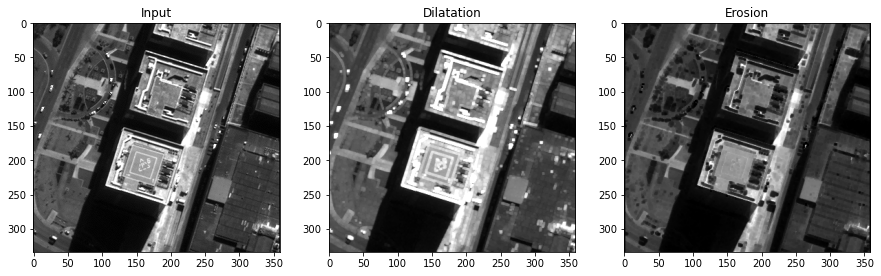

In [ ]:
import numpy as np

# Control Parameners
#defining the kernel
dilatarion_matrix = np.array([
[0, 1, 0],
[0, 1, 0],
[0, 1, 0]])

erosion_matrix = np.array([
[1, 1, 1],
[0, 0, 0],
[0, 0, 0],
])

one_kernels = np.ones((3,3))

stride = 1

color = 'gray'

##############################################

#Inicial Parametes
width  = kernel.shape[0]
height = kernel.shape[1]

# Creating a the size of the box
# Creating a midpoint
width_mean  = int( width/2)
height_mean = int(height/2)

leng = width*height            #lenth of width vector
new_matrix = rio_matrix.copy() #The matrix we use subtitution
rows   = new_matrix.shape[0]   #lent os rows
coluns = new_matrix.shape[1]   #lent of colluns

#Creating a variable size for the box_matrix
def lower_width(x):  return 0 if x < width_mean else x - width_mean
def upper_width(x):  return x + width_mean +1 if x < rows-width_mean else rows
def lower_height(x): return 0 if x < height_mean else x - height_mean
def upper_height(x): return x +height_mean +1 if x < coluns-height_mean else coluns

####################################################

############ D I L A T A T I O N ###################

####################################################

kernel = one_kernels.copy()

#ones = np.zeros_like((new_matrix.shape[0]+2),(new_matrix.shape[1]+2))
ones = np.ones((new_matrix.shape[0],new_matrix.shape[1]))
#Defining
for i in range(0,rows,stride):
    #new_row.append(0)
    for j in range(0,coluns,stride):
        box_matrix = new_matrix[lower_width(i)  : upper_width(i) ,
                                lower_height(j) : upper_height(j)]
        aux = []
        aux = box_matrix.copy()
        aux[aux>0]=1

        if (aux == kernel[0:box_matrix.shape[0],0:box_matrix.shape[1]]).any():
            ones[i,j] = box_matrix.max()
        else:
            ones[i,j] = 0
conv_matrix_dilatation = ones#[ones != 1]


####################################################

############### E R O S I O N  #####################

####################################################

kernel = one_kernels.copy()

#ones = np.zeros_like((new_matrix.shape[0]+2),(new_matrix.shape[1]+2))
jones = np.ones((new_matrix.shape[0],new_matrix.shape[1]))
#Defining
for i in range(0,rows,stride):
    #new_row.append(0)
    for j in range(0,coluns,stride):
        box_matrix = new_matrix[lower_width(i)  : upper_width(i) ,
                                lower_height(j) : upper_height(j)]
        aux = []
        aux = box_matrix.copy()
        aux[aux>0]=1

        if not (False == (aux == kernel[0:box_matrix.shape[0],0:box_matrix.shape[1]])).any():
            jones[i,j] = box_matrix.min()
        else:
            jones[i,j] = 0
        #avarege_kernel          = np.ones((box_matrix.shape[0],box_matrix.shape[1]))*weigth #creating the kernel
conv_matrix_erosion = jones#[ones != 1]



#Ploting
plt.figure(figsize=(15,30))
plt.subplot(131)
plt.imshow(rio_matrix, cmap = color)#,vmin=0, vmax=100)
plt.title('Input')

plt.subplot(132)
plt.imshow(conv_matrix_dilatation, cmap= color)
plt.title('Dilatation')

plt.subplot(133)
plt.imshow(conv_matrix_erosion, cmap = color)#,vmin=0, vmax=100)
plt.title('Erosion')

plt.show()
